In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv("/content/train.csv")

print(" Titanic dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


🔥 Titanic dataset loaded successfully!
Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# ***EDA And Plots***

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128697 (\N{MENS SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128698 (\N{WOMENS SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


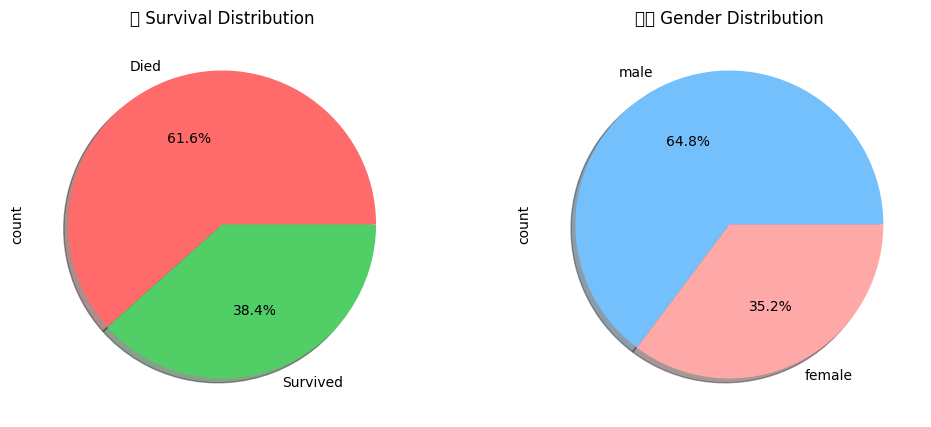

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Pie Chart: Survival
df["Survived"].value_counts().plot.pie(
    labels=["Died", "Survived"],
    autopct="%1.1f%%",
    colors=["#ff6b6b", "#51cf66"],
    shadow=True,
    ax=ax[0]
)
ax[0].set_title(" Survival Distribution")

# Pie Chart: Gender
df["Sex"].value_counts().plot.pie(
    autopct="%1.1f%%",
    colors=["#74c0fc", "#ffa8a8"],
    shadow=True,
    ax=ax[1]
)
ax[1].set_title(" Gender Distribution")

plt.show()


In [4]:
features = ["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "Embarked"]
target = "Survived"

df = df[features + [target]]

df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

X = df[features]
y = df[target]


/tmp/ipython-input-1521857058.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-1521857058.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

# ***Logistic Regression Pipeline***

In [5]:
numeric_features = ["Age", "Fare", "SibSp", "Parch"]
categorical_features = ["Sex", "Embarked", "Pclass"]

preprocess = ColumnTransformer(
    [
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(), categorical_features)
    ]
)

log_reg = LogisticRegression(max_iter=1000)

pipeline = Pipeline([
    ("preprocess", preprocess),
    ("model", log_reg)
])


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipeline.fit(X_train, y_train)
preds = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, preds))
print("\nClassification Report:\n")
print(classification_report(y_test, preds))


Accuracy: 0.8044692737430168

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



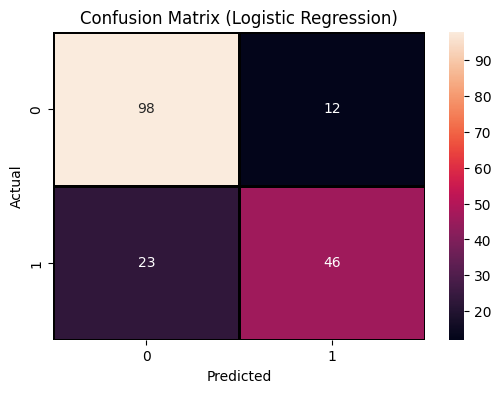

In [7]:
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="rocket", linewidths=2, linecolor="black")
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ***Important Feature***

/tmp/ipython-input-1613050181.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=fi, palette="coolwarm")


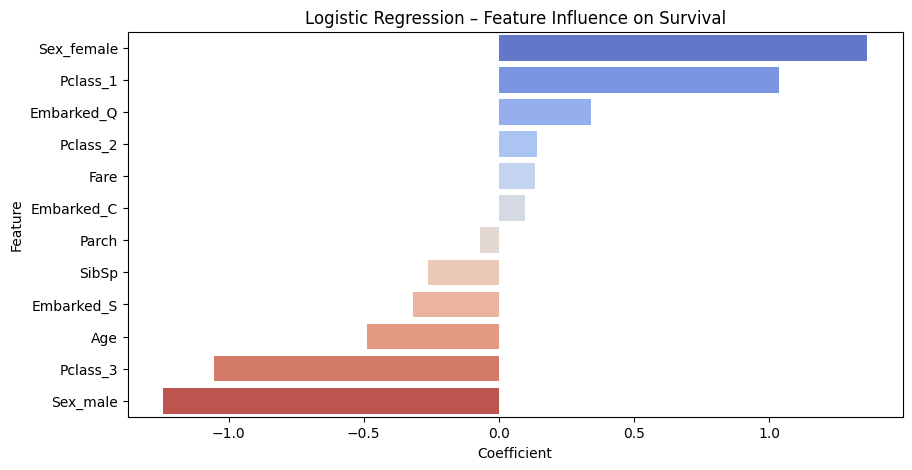

,Feature,Coefficient
4,Sex_female,1.364127
9,Pclass_1,1.036173
7,Embarked_Q,0.342662
10,Pclass_2,0.139668
1,Fare,0.134449
6,Embarked_C,0.097319
3,Parch,-0.069930
2,SibSp,-0.260923
8,Embarked_S,-0.318975
0,Age,-0.486963


In [8]:
ohe = pipeline.named_steps["preprocess"].named_transformers_["cat"]
encoded_cols = list(ohe.get_feature_names_out(categorical_features))

final_features = numeric_features + encoded_cols
coeffs = pipeline.named_steps["model"].coef_[0]

fi = pd.DataFrame({
    "Feature": final_features,
    "Coefficient": coeffs
}).sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x="Coefficient", y="Feature", data=fi, palette="coolwarm")
plt.title("Logistic Regression – Feature Influence on Survival")
plt.show()

fi


# ***Sigmoid s-curve***

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


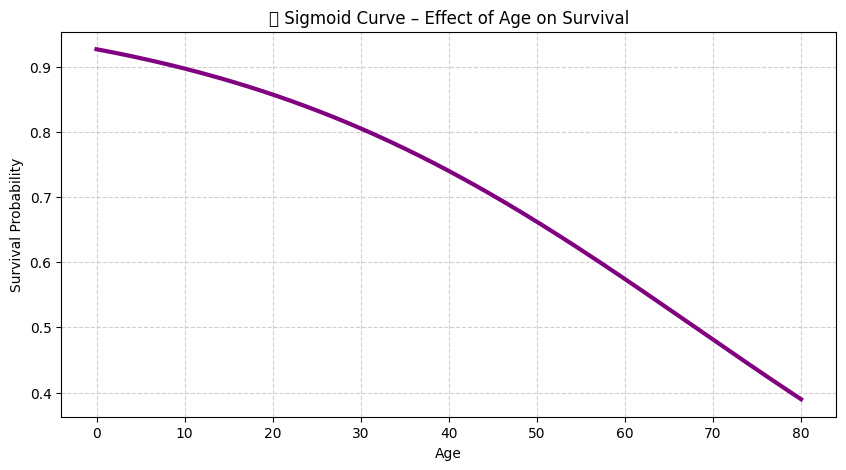

In [9]:

age_range = np.linspace(0, 80, 200)

# baseline passenger
constant_passenger = {
    "Pclass": 2,
    "Sex": "female",
    "Fare": df["Fare"].median(),
    "SibSp": 0,
    "Parch": 0,
    "Embarked": "S"
}

age_df = pd.DataFrame([
    {
        "Age": age,
        **constant_passenger
    }
    for age in age_range
])

probs = pipeline.predict_proba(age_df)[:, 1]

plt.figure(figsize=(10,5))
plt.plot(age_range, probs, color='purple', linewidth=3)
plt.title("Sigmoid Curve – Effect of Age on Survival")
plt.xlabel("Age")
plt.ylabel("Survival Probability")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
